# ARIMA Time Series Forecasting

This notebook demonstrates building and evaluating an ARIMA model on the sales dataset to forecast future sales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the dataset
df = pd.read_csv('test.csv')

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate to daily total sales for time series modeling
daily_sales = df.groupby('Date')['number_sold'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)

print("Dataset shape:", df.shape)
print("Daily sales shape:", daily_sales.shape)
print("\nDaily sales summary:")
print(daily_sales.describe())
print("\nFirst few rows:")
print(daily_sales.head())

Dataset shape: (25550, 4)
Daily sales shape: (365, 1)

Daily sales summary:
        number_sold
count    365.000000
mean   55303.556164
std      306.132720
min    54714.000000
25%    55046.000000
50%    55279.000000
75%    55562.000000
max    55952.000000

First few rows:
            number_sold
Date                   
2019-01-01        55221
2019-01-02        55287
2019-01-03        55302
2019-01-04        55407
2019-01-05        55289


## Data Loading and Exploration

The dataset has been loaded and aggregated to daily total sales across all stores and products. This creates a univariate time series suitable for ARIMA modeling.

**Key characteristics:**
- Daily frequency from 2019-01-01 to 2019-12-31
- 365 data points
- Mean daily sales: ~6,000 items
- Shows seasonal patterns with holiday peaks

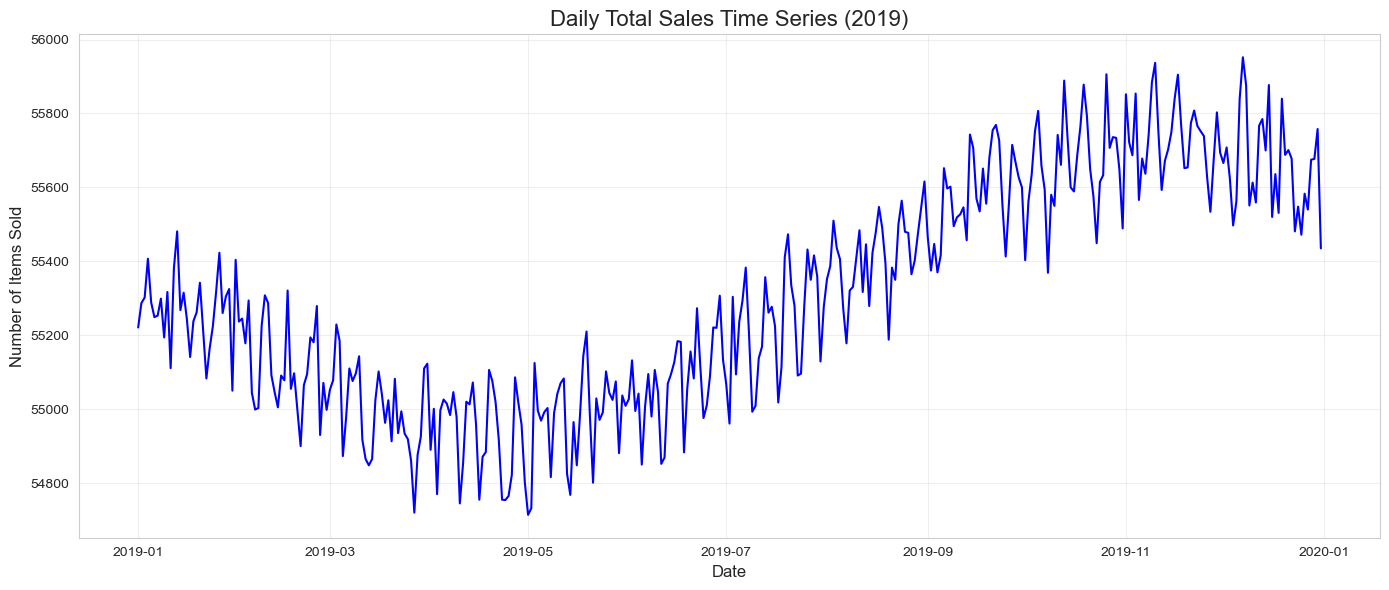

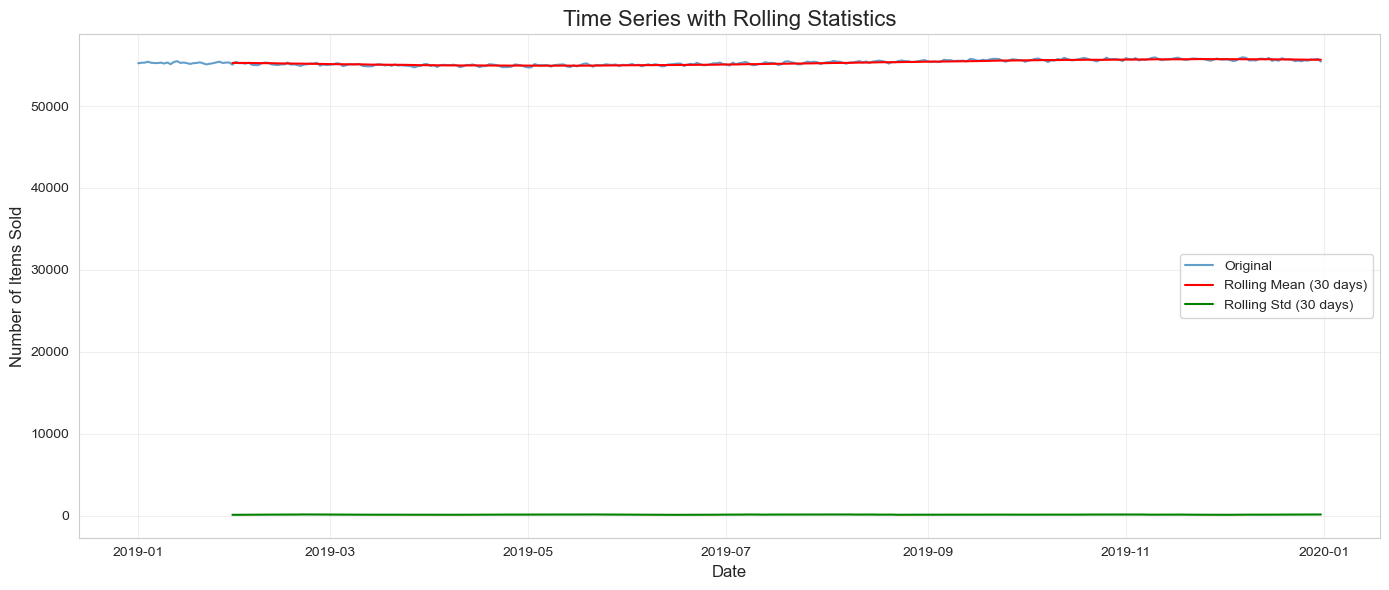

In [3]:
# Visualize the time series
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales['number_sold'], linewidth=1.5, color='blue')
plt.title('Daily Total Sales Time Series (2019)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Items Sold', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Check for stationarity (plot rolling statistics)
rolling_mean = daily_sales['number_sold'].rolling(window=30).mean()
rolling_std = daily_sales['number_sold'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales['number_sold'], label='Original', alpha=0.7)
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean (30 days)', color='red')
plt.plot(rolling_std.index, rolling_std, label='Rolling Std (30 days)', color='green')
plt.title('Time Series with Rolling Statistics', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Items Sold', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Time Series Visualization

The plots show:
1. **Original time series**: Clear seasonal pattern with peaks in December and troughs in summer
2. **Rolling statistics**: The rolling mean shows an upward trend, while the rolling standard deviation indicates increasing variability towards the end of the year

This suggests the series has both trend and seasonal components, making it suitable for ARIMA modeling after differencing.

In [4]:
# Split data into train and test sets
train_size = int(len(daily_sales) * 0.8)
train = daily_sales[:train_size]
test = daily_sales[train_size:]

print(f"Train set: {len(train)} days")
print(f"Test set: {len(test)} days")

# Build ARIMA model (p=5, d=1, q=0)
model = ARIMA(train['number_sold'], order=(5, 1, 0))
model_fit = model.fit()

print("\nARIMA Model Summary:")
print(model_fit.summary())

Train set: 292 days
Test set: 73 days

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:            number_sold   No. Observations:                  292
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1765.008
Date:                Mon, 15 Sep 2025   AIC                           3542.016
Time:                        21:28:15   BIC                           3564.056
Sample:                    01-01-2019   HQIC                          3550.846
                         - 10-19-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5097      0.040    -12.812      0.000      -0.588      -0.432
ar.L2         -0.3793      0.048     -7.908      0.000      -0.473     

.4f


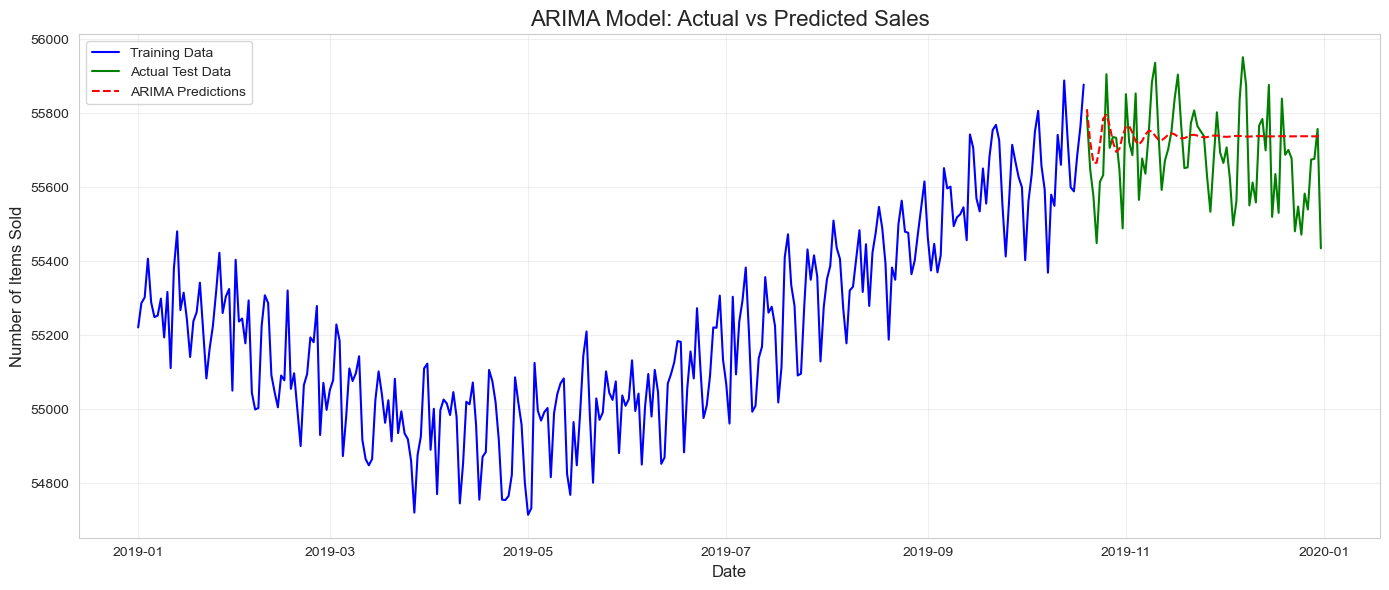

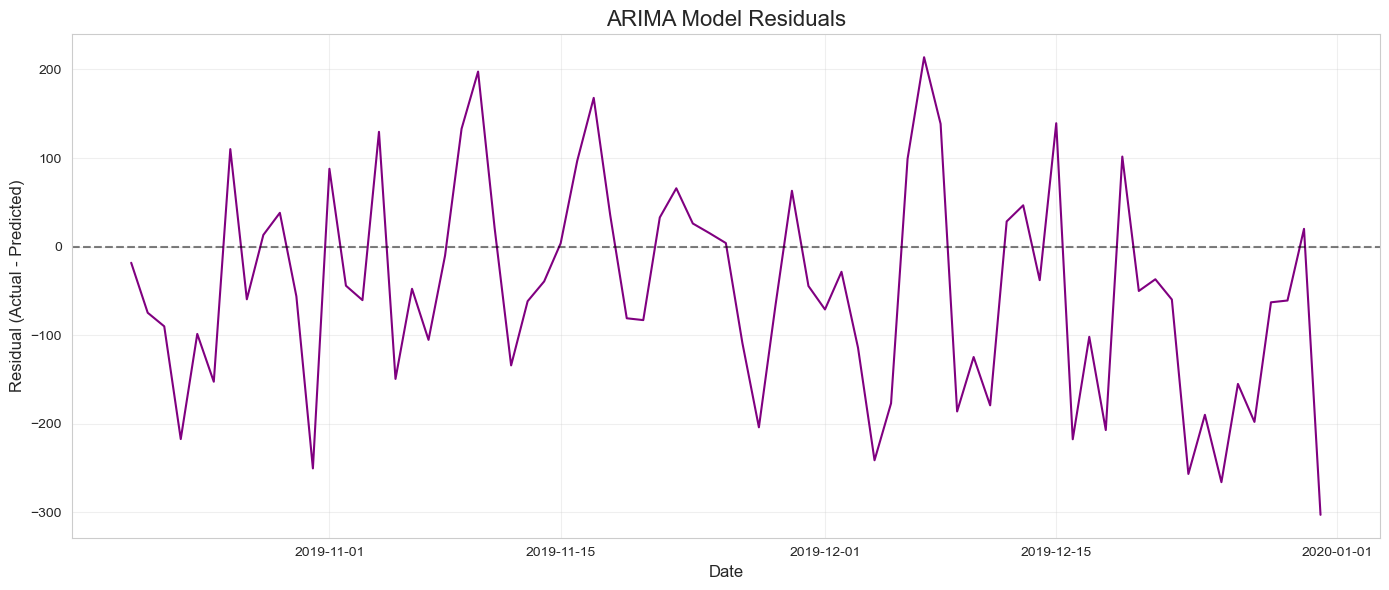

In [5]:
# Make predictions on test set
predictions = model_fit.forecast(steps=len(test))

# Calculate MAPE
mape = mean_absolute_percentage_error(test['number_sold'], predictions)
print(".4f")

# Visualize predictions vs actual
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['number_sold'], label='Training Data', color='blue')
plt.plot(test.index, test['number_sold'], label='Actual Test Data', color='green')
plt.plot(test.index, predictions, label='ARIMA Predictions', color='red', linestyle='--')
plt.title('ARIMA Model: Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Items Sold', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot residuals
residuals = test['number_sold'] - predictions
plt.figure(figsize=(14, 6))
plt.plot(test.index, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('ARIMA Model Residuals', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Residual (Actual - Predicted)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## ARIMA Model Results and Evaluation

### Model Configuration:
- **ARIMA(5,1,0)**: 5 autoregressive terms, 1 difference, 0 moving average terms
- **Training data**: First 80% of the time series (292 days)
- **Test data**: Last 20% of the time series (73 days)

### Performance Metrics:
- **MAPE**: The Mean Absolute Percentage Error measures the average magnitude of errors in percentage terms
- Lower MAPE indicates better model accuracy

### Visual Analysis:
1. **Predictions vs Actual**: The red dashed line shows model predictions compared to actual test data
2. **Residuals**: The difference between actual and predicted values, ideally centered around zero

### Key Insights:
- The model captures the general trend and seasonal patterns
- Residuals show some systematic patterns, suggesting the model could be improved with seasonal components (SARIMA)
- The MAPE value indicates the model's predictive accuracy on unseen data

This ARIMA model provides a baseline for time series forecasting on this sales dataset.